In [1]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy
import numpy as np
import pandas as pd
import pykinect2
import panel as pn
import matplotlib
pn.extension()
from bokeh.plotting import figure, show, output_file
import cv2
from cv2 import aruco
import scipy.spatial.distance as cdist

Freenect module not found, KinectV1 will not work.


./../../../gempy-1.16\gempy\plotting\visualization.py:31: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')
./../../../gempy-1.16\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
./../../../gempy-1.16\gempy\data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
./../../../gempy-1.16\gempy\posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.")
./../../../gempy-1.16\gempy\posterior_analysis.py:28: Use

In [3]:
calib = sb.CalibrationData(file = 'my_calibration.json')
kinect = sb.KinectV2(calib)

#sensor = sb.DummySensor(calib, depth_limits=(500,2000))
sensor = sb.KinectV2(calib)
projector = sb.Projector(calib)
module = sb.CalibModule(calib, sensor, projector)
marker = sb.ArucoMarkers(sensor)
auto = sb.AutomaticModule(calib, sensor, projector)


JSON configuration loaded.
KinectV2 initialized.
KinectV2 initialized.


Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [4]:
marker.create_CoordinateMap()

Depth_x  Depth_y  Depth_Z(mm)  Color_x  Color_y  Camera_x(m)  \
0           214       15         2318      866      -65    -0.265707   
1           215       15         2321      869      -65    -0.259773   
2           216       15         2321      872      -65    -0.253494   
3           217       15         2324      875      -65    -0.247536   
4           218       15         2319      878      -65    -0.240732   
...         ...      ...          ...      ...      ...          ...   
184931      506      423          870     1806     1188     0.639374   
184932      507      423          856     1812     1189     0.632321   
184933      508      423          864     1815     1190     0.641511   
184934      509      423          841     1821     1191     0.627639   
184935      510      423          872     1823     1192     0.654113   

        Camera_y(m)  Camera_z(m)  
0          1.203393        2.318  
1          1.204916        2.321  
2          1.204884        2.321  
3          1.206409        2.324  
4          1.203783        2.319  
...             ...          ...  
184931    -0.553012        0.870  
184932    -0.544730        0.856  
184933    -0.550450        0.864  
184934    -0.536415        0.841  
184935    -0.556836        0.872  

[184936 rows x 8 columns]

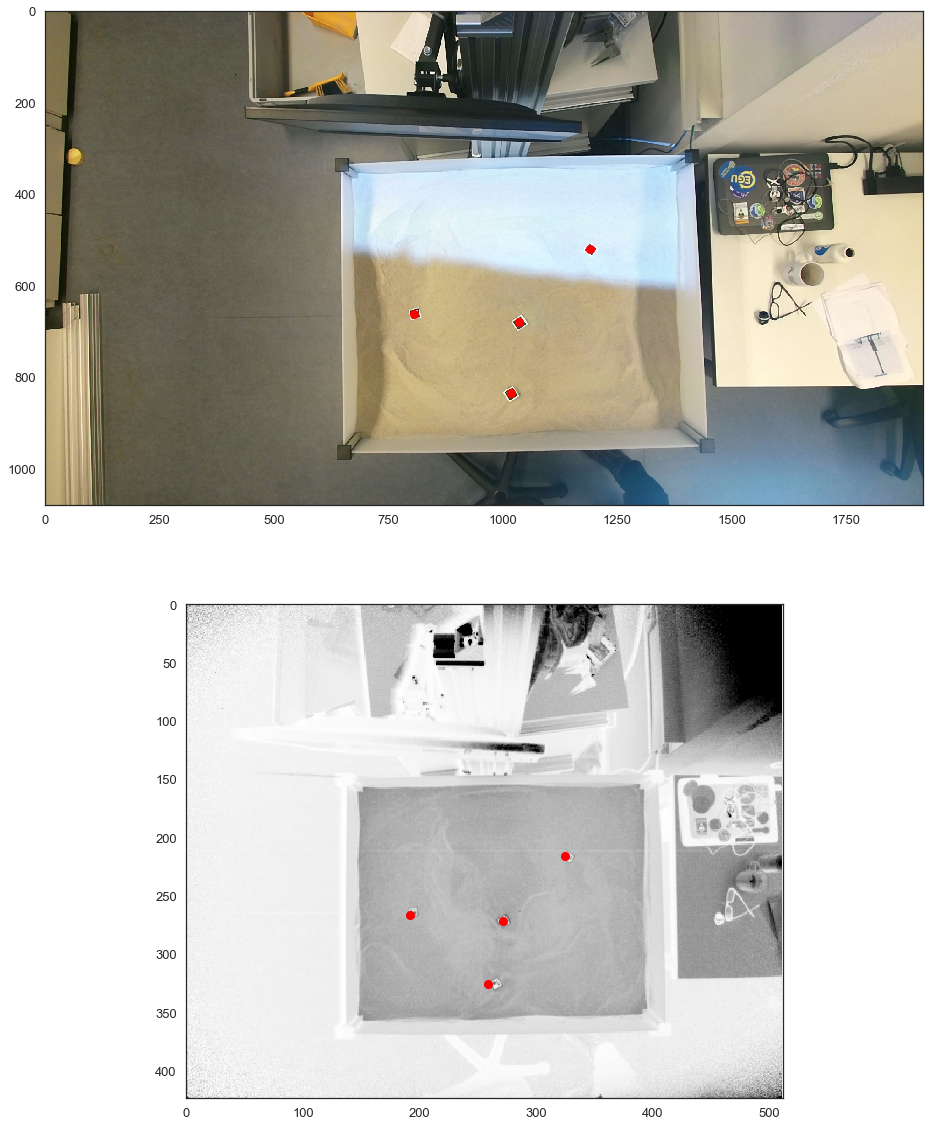

In [5]:
point_marker = marker.location_points(4)

In [33]:
point_marker

ids  Depth_x  Depth_y  Depth_Z(mm)  Color_x  Color_y  Camera_x(m)  \
157622    2    347.0    346.0       1912.0   1243.0    896.0     0.466837   
159717    5    218.0    351.0        759.0    917.0    906.0    -0.078602   
111825   15    285.0    249.0       1572.0   1075.0    615.0     0.121751   
143489    1    280.0    316.0       1258.0   1067.0    807.0     0.080062   

        Camera_y(m)  Camera_z(m)  
157622    -0.715721        1.912  
159717    -0.294308        0.759  
111825    -0.178369        1.572  
143489    -0.369682        1.258

In [38]:
from datetime import date
import time
from random import randin

from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models import ColumnDataSource, PointDrawTool
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.plotting import figure

ImportError: cannot import name 'randin' from 'random' (C:\Users\Admin\Miniconda3\lib\random.py)

In [54]:


output_file("pointDrawResults.html")

data = { "x": [5, 2, 8], "y": [5, 7, 8]}

src = ColumnDataSource(data)

columns = [
        TableColumn(field = "x", title = "xs"),
        TableColumn(field = "y", title = "ys"),
        ]
data_table = DataTable(source = src, columns = columns, width = 400, height = 280)

plot = figure(x_range = (0, 10), y_range = (0, 10), width = 400, height = 400, title = "Point Draw Tool")

renderer = plot.circle("x", "y", size = 15, fill_color = "blue", fill_alpha = 0.8, source = src)

draw_tool = PointDrawTool(renderers = [renderer], empty_value = 1)
plot.add_tools(draw_tool)
plot.toolbar.active_drag = draw_tool


show(plot)
show(widgetbox(data_table))

In [58]:
renderer.visible

True

In [42]:
data_table

DataTable(id='1292', ...)

In [36]:
import holoviews as hv
from holoviews import opts, streams
from holoviews.plotting.links import DataLink

hv.extension('bokeh')

ModuleNotFoundError: No module named 'holoviews'

In [35]:
data = ([0, 0.5, 1], [0, 0.5, 0], ['red', 'green', 'blue'])
points = hv.Points(data, vdims='color').redim.range(x=(-.1, 1.1), y=(-.1, 1.1))
point_stream = streams.PointDraw(data=points.columns(), num_objects=10, source=points, empty_value='black')
table = hv.Table(points, ['x', 'y'], 'color')
DataLink(points, table)

(points + table).opts(
    opts.Layout(merge_tools=False),
    opts.Points(active_tools=['point_draw'], color='color', height=400,
                size=10, tools=['hover'], width=400),
    opts.Table(editable=True))

NameError: name 'hv' is not defined

In [ ]:
c1 = p.circle('x', 'y', 'width', 'height', source=source)
r1 = p.rect('x', 'y', 0.1, 0.1, source=source2)
tool = PointDrawTool(renderers=[c1, r1])

In [44]:
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import DataTable, TableColumn, Column, PointDrawTool, ColumnDataSource, CustomJS
import pandas as pd
import numpy as np

output_file("tools_point_draw.html")

_tools_to_show = 'box_zoom,pan,save,hover,reset,tap'        

p = figure(x_range=(0, 10), y_range=(0, 10), tools=_tools_to_show,
           plot_width=862, plot_height=604,
           title='Plot name')

p.background_fill_color = 'white'

d_true = {'x': [2, 3], 'y': [4, 1], 
          'color': ['red', 'red'],
          'desc': ['true','true']}

df_true = pd.DataFrame(d_true)
df_true['distance'] = [0]+[np.sqrt((df_true['x'][i]-df_true['x'][i-1])**2+(df_true['y'][i]-df_true['y'][i-1])**2) for i in range(1,len(df_true['x']))]
source = ColumnDataSource(df_true)

renderer2 = p.scatter(x='x', y='y', source=source, color='color', size=15,
                      line_color='red', line_width=5)
renderer = p.line(x='x', y='y', source=source, color='red',
                  line_dash='dashed', line_width=10)

columns = [TableColumn(field="x", title="I am X"),
           TableColumn(field="y", title="I am Y"),
           TableColumn(field='color', title='color'),
           TableColumn(field='desc', title='desc'),
           TableColumn(field='distance', title='distance')]

update = CustomJS(args=dict(source_data=source), code="""
    var data = source_data.data;
    var res = 0;

    //Sum of squares for euclidean
    for(var i = 1; i < data['x'].length ; i++) {
        res += Math.sqrt(Math.pow(data['x'][i] - data['x'][i-1], 2)+Math.pow(data['y'][i] - data['y'][i-1], 2));

        //Update table
        data['color'][i] = 'red';
        data['desc'][i] = 'true';
        data['distance'][i] = res;
    }

    source_data.change.emit();
    """)

source.js_on_change('data', update)

table = DataTable(source=source, columns=columns, editable=True, height=200, width=862)

draw_tool = PointDrawTool(renderers=[renderer, renderer2])
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool

show(Column(p, table))

In [94]:
p = figure(x_range=(0, 10), y_range=(0, 10), plot_width=862, plot_height=604)
d_true = {'x': [2, 3,5], 'y': [4, 1,8]}

df_true = pd.DataFrame(d_true)
source = ColumnDataSource(df_true)
renderer = p.scatter(x='x', y='y', source=source, size=15)
def _callback(df_true):
    print(df_true)
source.on_change('value',_callback(df_true))
source.link()
columns = [
        TableColumn(field = "x", title = "xs"),
        TableColumn(field = "y", title = "ys"),
        ]
table = DataTable(source=source, columns=columns, editable=True, height=200, width=862)

draw_tool = PointDrawTool(renderers=[renderer])
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool

show(Column(p, table))


   x  y
0  2  4
1  3  1
2  5  8


ValueError: attempted to add a callback on nonexistent ColumnDataSource.value property

In [99]:
source.update(df_true.x = 100)

SyntaxError: keyword can't be an expression (<ipython-input-99-e6badbe4abcb>, line 1)

In [48]:
source

ColumnDataSource(id='2039', ...)